# Times Series Analysis, Data Visualisations and Prediction Analysis using the XGBoost (ML) model

## Importing Dependencies

In [1]:
#Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


from datetime import datetime

## Loading the Dataset

In [2]:
df2= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2012.csv", parse_dates=["Date"])
df3= pd.read_csv(r"Cheltenham Swindon Road Hourly 2013.csv", parse_dates=["Date"])
df4= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2014.csv", parse_dates=["Date"])
df5= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2015.csv", parse_dates=["Date"]) 
df6= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2016.csv", parse_dates=["Date"])
df7= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2017.csv", parse_dates=["Date"])
df8= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2018 .csv", parse_dates=["Date"])
df9= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2019.csv", parse_dates=["Date"])
df10= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2020.csv", parse_dates=["Date"])
df11= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2021.csv", parse_dates=["Date"])


C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/01/2012' in DD/MM/Y

In [3]:
#Concatenate all the dataframes
merged_df = pd.concat([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])


In [4]:
merged_df

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
...,...,...,...,...,...,...
8755,2021-12-31,NaN,19,11.0,31.0,48.0
8756,2021-12-31,NaN,20,9.0,19.0,33.0
8757,2021-12-31,NaN,21,5.0,13.0,21.0
8758,2021-12-31,NaN,22,2.0,13.0,17.0


In [5]:
df_data = merged_df.copy()
df_data

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
...,...,...,...,...,...,...
8755,2021-12-31,NaN,19,11.0,31.0,48.0
8756,2021-12-31,NaN,20,9.0,19.0,33.0
8757,2021-12-31,NaN,21,5.0,13.0,21.0
8758,2021-12-31,NaN,22,2.0,13.0,17.0


## Data Pre-Processing
#Data columns that were not required to satisfy the objectives of this analysis were dropped.
#Columns were renamed
#Histogram was used to visualize the distribution of the Data
#Checked for Missing values and replaced them using the ffill method
#The Date column was cast to a datetime format. 
#The timeseries cross validation method was used to split the data.


In [6]:
df_data.drop(["Nitric Oxide m-3 (20'C 1013mb)"], axis=1, inplace=True)
df_data.drop(["Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)"], axis=1, inplace=True)
df_data.drop(['Month'], axis=1, inplace=True)
#df_data.drop(['Hour'], axis=1, inplace=True)
df_data

,Date,Hour,Nitrogen Dioxide m-3 (20'C 1013mb)
0,2012-01-01,0,8.0
1,2012-01-01,1,8.0
2,2012-01-01,2,8.0
3,2012-01-01,3,6.0
4,2012-01-01,4,6.0
...,...,...,...
8755,2021-12-31,19,31.0
8756,2021-12-31,20,19.0
8757,2021-12-31,21,13.0
8758,2021-12-31,22,13.0


###Renaming the Column

In [7]:
# Renaming Columns
df_data.rename(columns = {"Nitrogen Dioxide m-3 (20'C 1013mb)": 'NO2'}, inplace=True)

##CHECKING FOR MISSING VALUES

In [8]:
df_data.isnull().sum().sum()

2370

In [9]:
df_data['NO2'] = df_data['NO2'].replace(0.0, float('NaN'))

print(df_data)

           Date  Hour   NO2
0    2012-01-01     0   8.0
1    2012-01-01     1   8.0
2    2012-01-01     2   8.0
3    2012-01-01     3   6.0
4    2012-01-01     4   6.0
...         ...   ...   ...
8755 2021-12-31    19  31.0
8756 2021-12-31    20  19.0
8757 2021-12-31    21  13.0
8758 2021-12-31    22  13.0
8759 2021-12-31    23  11.0

[87672 rows x 3 columns]


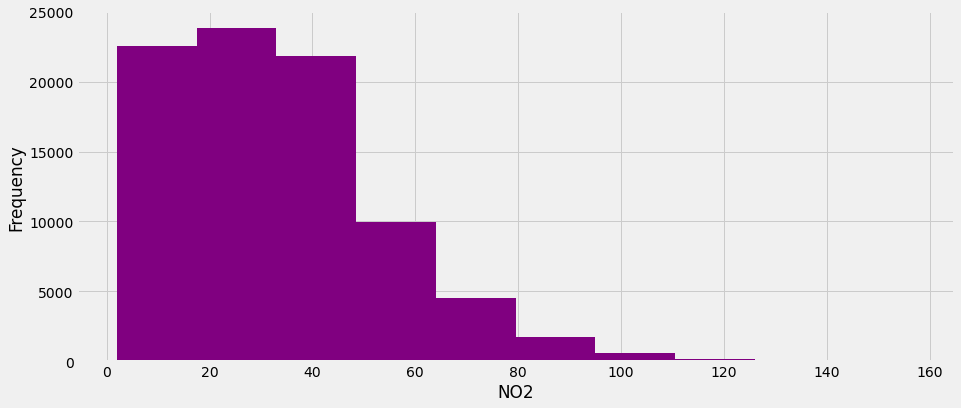

In [10]:
import matplotlib.pyplot as plt

# Showing distribution of NO2 emissions
plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.hist(df_data["NO2"], color="purple")
plt.xlabel("NO2")
plt.ylabel("Frequency")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [11]:
df_data["NO2"].fillna(method="ffill", inplace=True)

In [12]:
df=df_data

# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Merge "Date" and "Hour" columns into a single datetime column
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='H')

# Drop the original "Date" and "Hour" columns
df = df.drop(['Date', 'Hour'], axis=1)

# Print the updated DataFrame
print(df)

       NO2            Datetime
0      8.0 2012-01-01 00:00:00
1      8.0 2012-01-01 01:00:00
2      8.0 2012-01-01 02:00:00
3      6.0 2012-01-01 03:00:00
4      6.0 2012-01-01 04:00:00
...    ...                 ...
8755  31.0 2021-12-31 19:00:00
8756  19.0 2021-12-31 20:00:00
8757  13.0 2021-12-31 21:00:00
8758  13.0 2021-12-31 22:00:00
8759  11.0 2021-12-31 23:00:00

[87672 rows x 2 columns]


In [13]:
df_data=df

In [14]:
print(df_data.describe())

                NO2
count  87672.000000
mean      33.050290
std       20.165114
min        2.000000
25%       17.000000
50%       29.000000
75%       44.000000
max      157.000000


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87672 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO2       87672 non-null  float64       
 1   Datetime  87672 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 MB


## Creation of Temporal Variables Such as Winter, Spring, Autumn and Winter

In [16]:
# Assuming df_data is your DataFrame and 'Date' is the column containing the dates
df_data['Datetime'] = pd.to_datetime(df_data['Datetime'])  # Convert 'Date' column to datetime if it's not already
# Extract the month from the date and map it to the corresponding season
df_data['Season'] = df_data['Datetime'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
                                                  5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
                                                  9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'})

In [17]:
df_data = df_data.set_index('Datetime')


In [18]:
df_data.index = pd.to_datetime(df_data.index)


In [19]:
print(df_data.describe())

                NO2
count  87672.000000
mean      33.050290
std       20.165114
min        2.000000
25%       17.000000
50%       29.000000
75%       44.000000
max      157.000000


In [20]:
#Assuming you have already imported the necessary data and stored it in the 'df_data' DataFrame

# Filter the data for the desired time range
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]

# Group the data by month
group_data = filtered_data.groupby(filtered_data.index.month)

# Describe the NO2 column for each month
description = group_data['NO2'].describe()
print(description)

           count       mean        std  min   25%   50%   75%    max
Datetime                                                            
1         7440.0  37.710753  23.189012  2.0  19.0  33.0  52.0  136.0
2         6792.0  35.368669  21.911929  2.0  19.0  31.0  46.0  149.0
3         7440.0  35.000941  21.330754  2.0  19.0  31.0  48.0  142.0
4         7200.0  32.479306  19.307985  2.0  17.0  29.0  44.0  128.0
5         7440.0  30.252688  17.732622  2.0  17.0  27.0  40.0  138.0
6         7200.0  29.679167  17.672865  2.0  17.0  27.0  40.0  134.0
7         7440.0  29.427554  16.975881  2.0  17.0  27.0  40.0  138.0
8         7440.0  29.566398  16.966076  2.0  17.0  27.0  40.0  124.0
9         7200.0  32.143889  18.328222  2.0  17.0  31.0  44.0  149.0
10        7440.0  32.926882  19.836081  2.0  17.0  29.0  44.0  130.0
11        7200.0  38.063750  23.396323  2.0  19.0  34.0  52.0  157.0
12        7440.0  34.190726  21.405175  2.0  17.0  31.0  48.0  126.0


In [21]:
#Describing Data and Groupin this by month
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]
group_data = filtered_data.groupby(filtered_data.index.month)
description = group_data['NO2'].describe()
print(description)

           count       mean        std  min   25%   50%   75%    max
Datetime                                                            
1         7440.0  37.710753  23.189012  2.0  19.0  33.0  52.0  136.0
2         6792.0  35.368669  21.911929  2.0  19.0  31.0  46.0  149.0
3         7440.0  35.000941  21.330754  2.0  19.0  31.0  48.0  142.0
4         7200.0  32.479306  19.307985  2.0  17.0  29.0  44.0  128.0
5         7440.0  30.252688  17.732622  2.0  17.0  27.0  40.0  138.0
6         7200.0  29.679167  17.672865  2.0  17.0  27.0  40.0  134.0
7         7440.0  29.427554  16.975881  2.0  17.0  27.0  40.0  138.0
8         7440.0  29.566398  16.966076  2.0  17.0  27.0  40.0  124.0
9         7200.0  32.143889  18.328222  2.0  17.0  31.0  44.0  149.0
10        7440.0  32.926882  19.836081  2.0  17.0  29.0  44.0  130.0
11        7200.0  38.063750  23.396323  2.0  19.0  34.0  52.0  157.0
12        7440.0  34.190726  21.405175  2.0  17.0  31.0  48.0  126.0


In [22]:
# Group the data by hour
group_data = filtered_data.groupby(filtered_data.index.hour)

# Describe the NO2 column for each hour
description = group_data['NO2'].describe()
print(description)

           count       mean        std  min   25%   50%   75%    max
Datetime                                                            
0         3653.0  19.263345  13.222594  2.0  10.0  15.0  25.0   90.0
1         3653.0  16.720777  11.655929  2.0   8.0  13.0  21.0   77.0
2         3653.0  15.595127  10.769620  2.0   8.0  13.0  21.0   75.0
3         3653.0  15.367096  10.493840  2.0   8.0  11.0  19.0   75.0
4         3653.0  17.285245  10.642847  2.0  10.0  15.0  23.0   75.0
5         3653.0  23.342458  13.544424  2.0  11.0  21.0  33.0   77.0
6         3653.0  33.891596  18.928839  2.0  19.0  31.0  46.0  115.0
7         3653.0  41.222831  22.151454  2.0  25.0  38.0  54.0  136.0
8         3653.0  42.429784  22.951287  2.0  25.0  38.0  55.0  157.0
9         3653.0  40.757186  20.766392  2.0  25.0  36.0  52.0  147.0
10        3653.0  39.263893  18.074445  2.0  27.0  36.0  50.0  142.0
11        3653.0  38.824254  16.858287  2.0  27.0  36.0  48.0  120.0
12        3653.0  38.269915  16.23

In [23]:

# Filter the data for the desired time range
#filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]

# Group the data by year
group_data = filtered_data.groupby(filtered_data.index.year)

# Describe the NO2 column for each year
description = group_data['NO2'].describe()
print(description)

           count       mean        std  min   25%   50%   75%    max
Datetime                                                            
2012      8784.0  37.308515  22.274012  2.0  21.0  34.0  50.0  142.0
2013      8760.0  36.466553  22.288030  2.0  19.0  33.0  50.0  157.0
2014      8760.0  34.774429  20.216790  2.0  19.0  33.0  48.0  124.0
2015      8760.0  33.557763  19.259160  2.0  19.0  31.0  44.0  149.0
2016      8784.0  33.854053  20.568010  2.0  19.0  31.0  44.0  147.0
2017      8760.0  36.397374  20.754937  2.0  21.0  33.0  48.0  134.0
2018      8760.0  32.459132  18.124279  2.0  19.0  31.0  42.0  122.0
2019      8760.0  35.711872  20.461149  2.0  21.0  33.0  48.0  126.0
2020      8784.0  24.707650  16.418940  2.0  13.0  21.0  33.0  109.0
2021      8760.0  25.274543  15.527997  2.0  13.0  23.0  33.0  101.0


In [24]:
import pandas as pd

# Assuming you have already imported the necessary data and stored it in the 'df_data' DataFrame

# Filter the data for the desired time range
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]

# Define the seasons based on the index
seasons = pd.cut(filtered_data.index.month, bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'], right=False)

# Group the data by seasons
group_data = filtered_data.groupby(seasons)

# Describe the NO2 column for each season
description = group_data['NO2'].describe()
print(description)

          count       mean        std  min   25%   50%   75%    max
Winter  14232.0  36.593030  22.618038  2.0  19.0  31.0  50.0  149.0
Spring  22080.0  32.578714  19.611318  2.0  17.0  29.0  44.0  142.0
Summer  22080.0  29.556386  17.202528  2.0  17.0  27.0  40.0  138.0
Autumn  21840.0  34.362225  20.785651  2.0  19.0  31.0  46.0  157.0


In [25]:
import pandas as pd

# Assuming you have already imported the necessary data and stored it in the 'df_data' DataFrame

# Filter the data for the desired time range
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]

# Group the data by the day of the week
group_data = filtered_data.groupby(filtered_data.index.dayofweek)

# Describe the NO2 column for each day of the week
description = group_data['NO2'].describe()
print(description)

            count       mean        std  min   25%   50%   75%    max
Datetime                                                             
0         12528.0  33.560664  20.652801  2.0  17.0  31.0  44.0  134.0
1         12528.0  34.556753  20.929193  2.0  19.0  31.0  46.0  149.0
2         12528.0  33.975415  20.151376  2.0  19.0  31.0  46.0  147.0
3         12528.0  34.692768  20.409171  2.0  19.0  31.0  48.0  140.0
4         12528.0  35.134898  21.212872  2.0  19.0  33.0  48.0  157.0
5         12504.0  31.374520  19.046467  2.0  17.0  29.0  42.0  136.0
6         12528.0  28.053799  17.561273  2.0  15.0  25.0  36.0  149.0


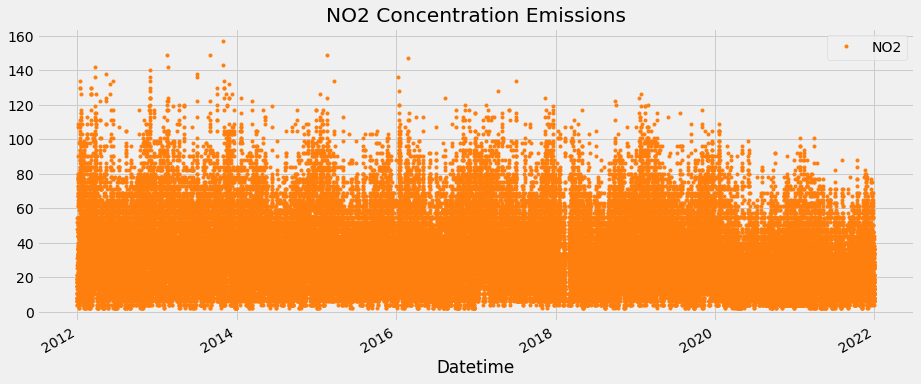

In [26]:
df_data.plot(style='.',
        figsize=(14, 6),
        color=color_pal[1],
        title='NO2 Concentration Emissions')
plt.show()

## Visualisation of Weekly Data

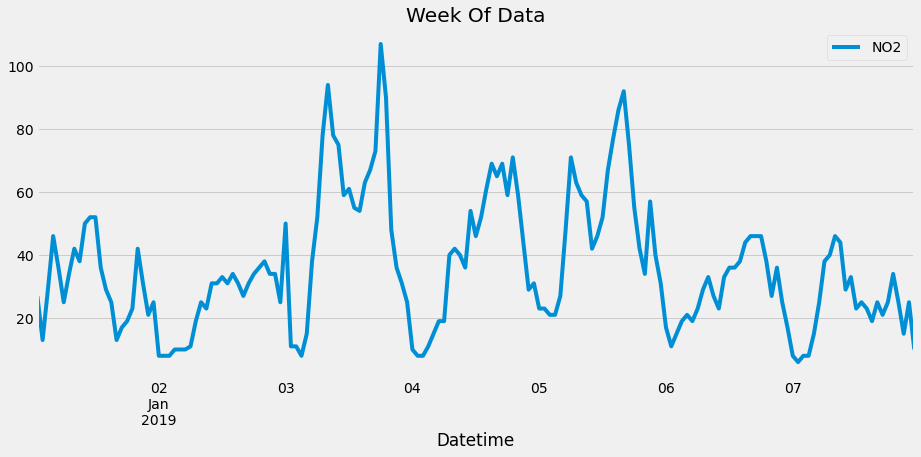

In [27]:
df_data.loc[(df_data.index > '01-01-2019') & (df_data.index < '01-08-2019')] \
    .plot(figsize=(14, 6), title='Week Of Data')
plt.show()

## Visualsation of Feature and Target Relationships

In [28]:
def create_features(df_data):
    """
    Create time series features based on time series index.
    """
    df_data = df_data.copy()
    df_data['hour'] = df_data.index.hour
    df_data['dayofweek'] = df_data.index.dayofweek
    df_data['quarter'] = df_data.index.quarter
    df_data['month'] = df_data.index.month
    df_data['year'] = df_data.index.year
    df_data['dayofyear'] = df_data.index.dayofyear
    df_data['dayofmonth'] = df_data.index.day
    df_data['weekofyear'] = df_data.index.isocalendar().week
    return df_data

df_data = create_features(df_data)


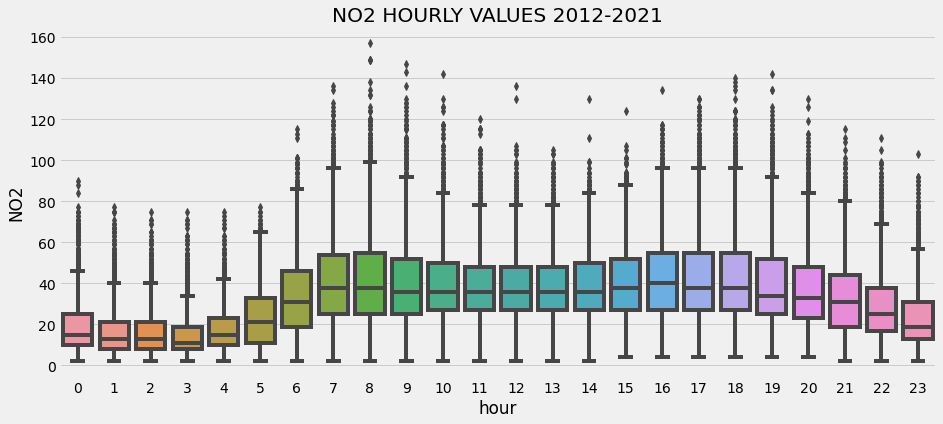

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_data, x='hour', y='NO2')
ax.set_title('NO2 HOURLY VALUES 2012-2021')
plt.show()


In [30]:
#fig, ax = plt.subplots(figsize=(14, 6))
#sns.boxplot(data=df_data, x='dayofweek', y='NO2')
#ax.set_title('NO2 HOURLY VALUES 2012-2021')
#plt.show()

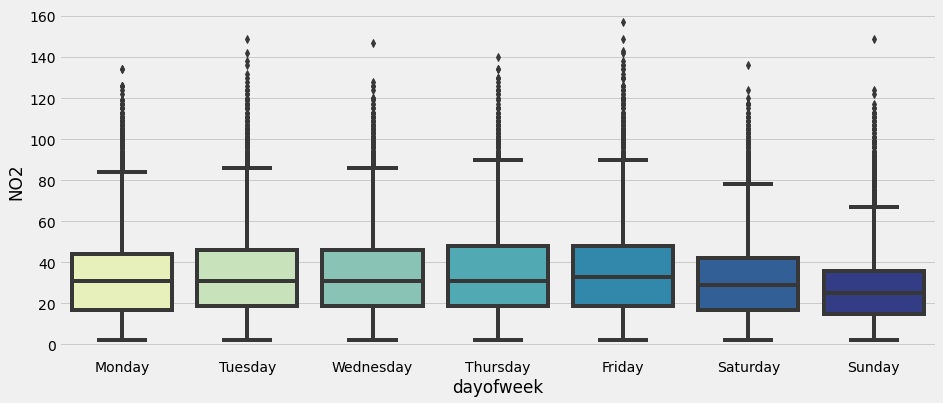

In [31]:
import calendar

fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_data, x='dayofweek', y='NO2', palette='YlGnBu')

# Modify x-axis tick labels to show day of the week names
ax.set_xticklabels(list(calendar.day_name))

plt.show()

In [32]:
#fig, ax = plt.subplots(figsize=(14, 6))
#sns.boxplot(data=df_data, x='quarter', y='NO2', palette='Blues')
#ax.set_title('NO2 MONTHLY VALUES, 2012-2021')
#plt.show()

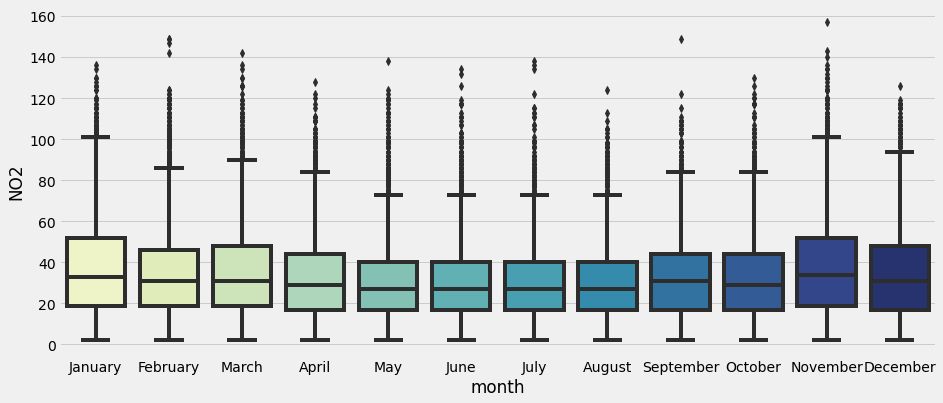

In [33]:
import calendar

fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_data, x='month', y='NO2', palette='YlGnBu')

# Modify x-axis tick labels to show month names
ax.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])

plt.show()

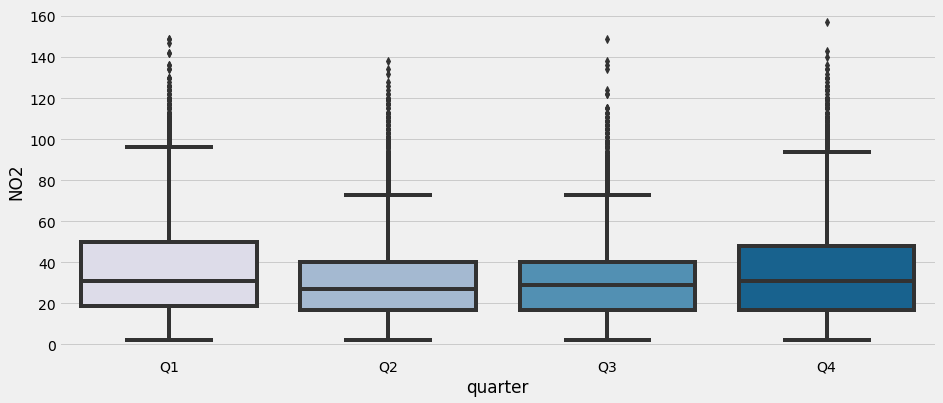

In [34]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_data, x='quarter', y='NO2', palette='PuBu')

# Modify x-axis tick labels to show quarter names
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
ax.set_xticklabels(quarters)


plt.show()

In [35]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}

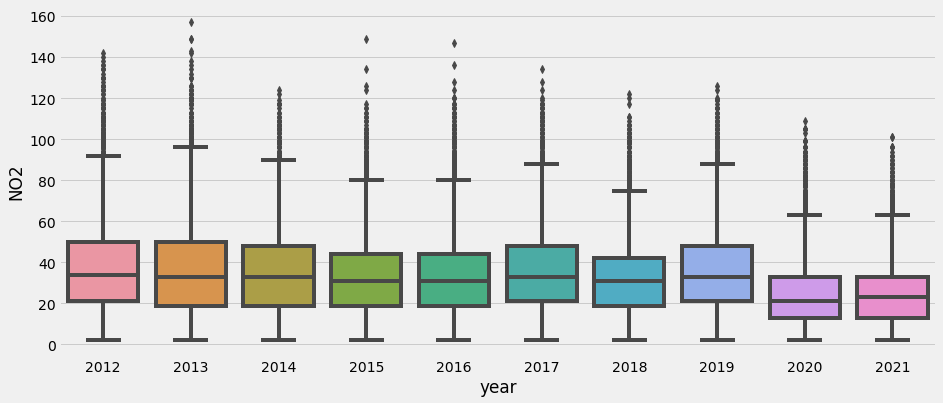

In [36]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_data, x='year', y='NO2')
plt.show()

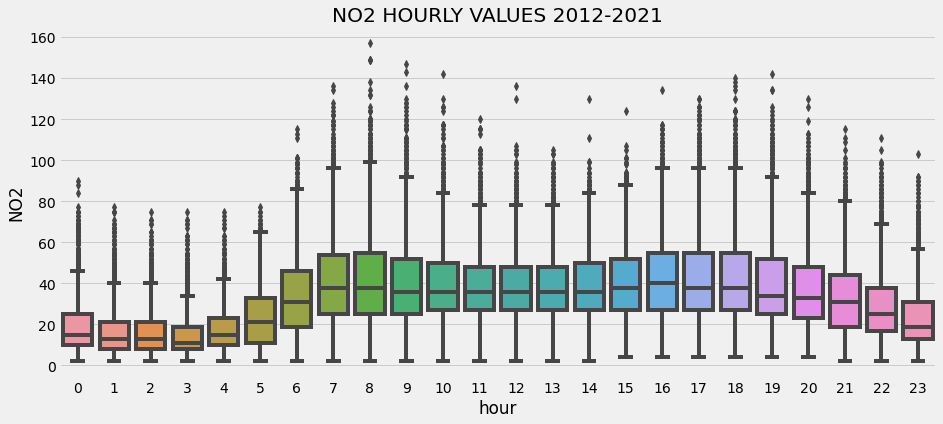

In [37]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_data, x='hour', y='NO2')
ax.set_title('NO2 HOURLY VALUES 2012-2021')
plt.show()

## Creating a Model

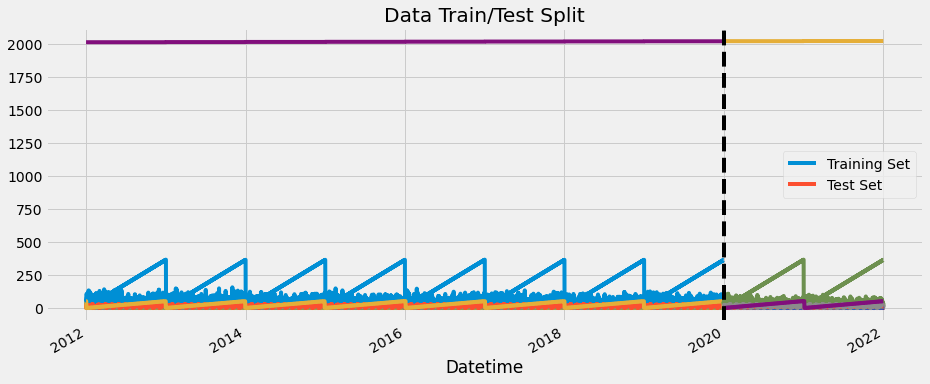

In [38]:
#Splitting into Train and Test split
from sklearn.model_selection import train_test_split
train = df_data.loc[df_data.index < '01-01-2020']
test = df_data.loc[df_data.index >= '01-01-2020']

fig, ax = plt.subplots(figsize=(14, 6))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2020', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

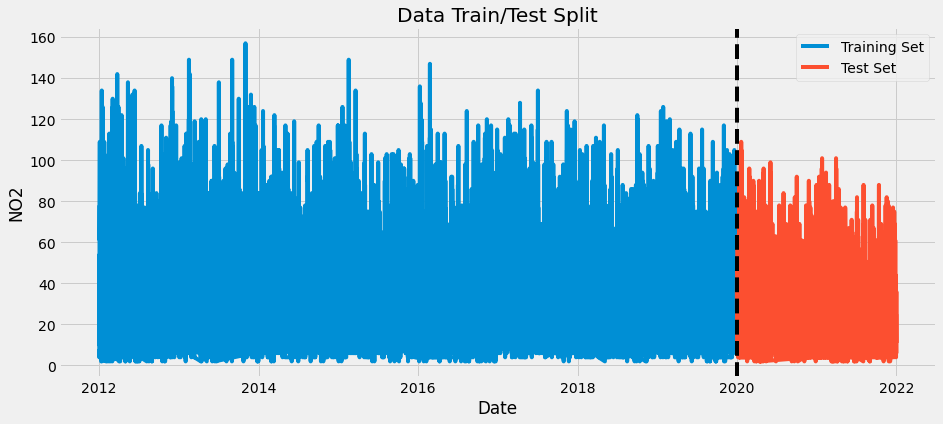

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

train = df_data.loc[df_data.index < '01-01-2020']
test = df_data.loc[df_data.index >= '01-01-2020']

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(train.index, train['NO2'], label='Training Set')
ax.plot(test.index, test['NO2'], label='Test Set')
ax.axvline(mdates.datestr2num('01-01-2020'), color='black', ls='--')
ax.set_title('Data Train/Test Split')
ax.set_xlabel('Date')
ax.set_ylabel('NO2')
ax.legend()
plt.show()

In [40]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'NO2'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

## Exploring Feature Importance

In [41]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[11:22:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:39.91223	validation_1-rmse:28.92736
[100]	validation_0-rmse:21.92535	validation_1-rmse:14.15029
[174]	validation_0-rmse:18.48914	validation_1-rmse:14.39314


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

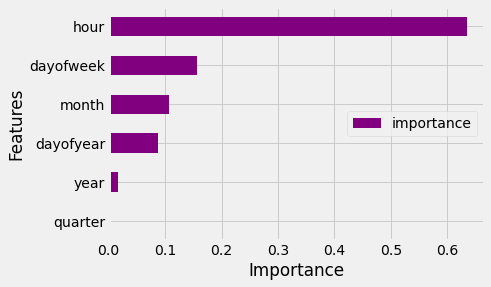

In [42]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fi_sorted = fi.sort_values('importance')
ax = fi_sorted.plot(kind='barh', color='purple')
plt.xlabel('Importance')
plt.ylabel('Features')
ax.legend(loc='center right')
plt.show()

## Comparing Forecast and Test Values for Yearly and Weekly predictions

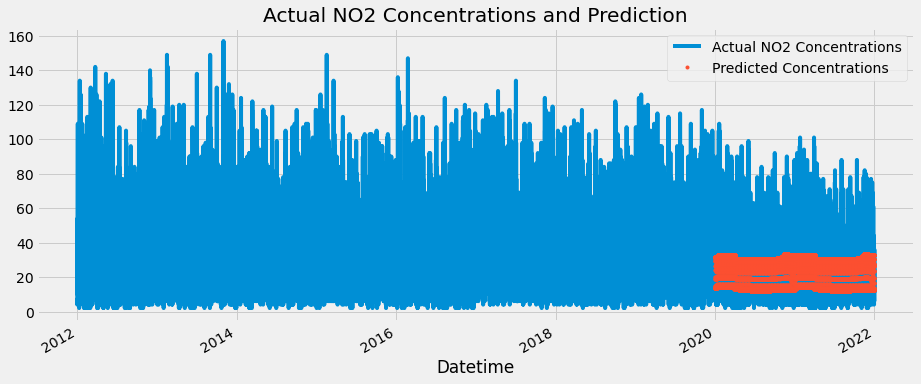

In [43]:
#Comparing Annual Predictions
test['prediction'] = reg.predict(X_test)
df_data = df_data.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df_data[['NO2']].plot(figsize=(14, 6))
df_data['prediction'].plot(ax=ax, style='.')
plt.legend(['Actual NO2 Concentrations', 'Predicted Concentrations'])
ax.set_title('Actual NO2 Concentrations and Prediction')
plt.show()



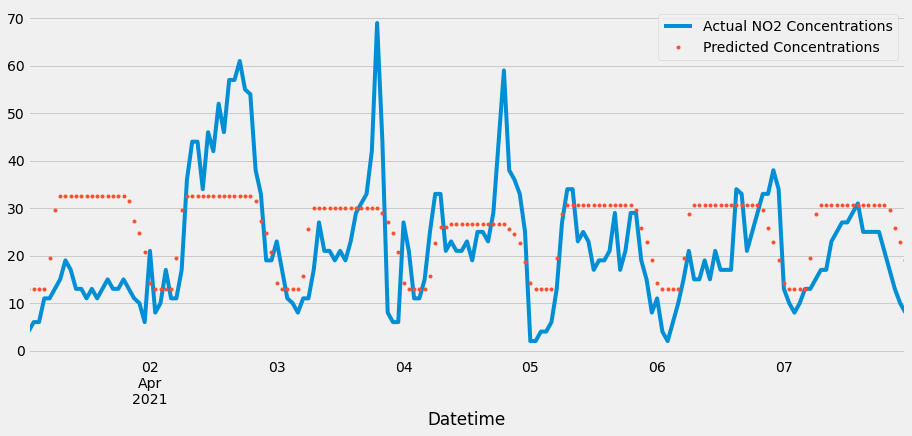

In [44]:
#Comparing Weekly Predictions
ax = df_data.loc[(df_data.index > '04-01-2021') & (df_data.index < '04-08-2021')]['NO2'] \
    .plot(figsize=(14, 6))
df_data.loc[(df_data.index > '04-01-2021') & (df_data.index < '04-08-2021')]['prediction'] \
    .plot(style='.')
plt.legend(['Actual NO2 Concentrations','Predicted Concentrations'])
plt.show()

## Calculate RMSE Score

In [45]:
from tensorflow.keras.metrics import RootMeanSquaredError
score = np.sqrt(mean_squared_error(test['NO2'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 13.85


## Considering the Best and Worst Predicted Days

In [46]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2021-03-06    2.236418
2021-08-20    2.705069
2021-07-31    2.985186
2020-06-10    3.063916
2020-06-14    3.104792
2020-10-10    3.419272
2020-08-24    3.445701
2021-10-09    3.598118
2020-09-30    3.629120
2020-04-09    3.834238
Name: error, dtype: float64

In [47]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2020-01-20    45.615508
2020-01-18    45.334193
2020-01-21    42.990508
2020-05-02    35.722037
2020-06-03    35.063682
2020-06-02    34.772016
2020-01-19    30.636041
2020-01-22    27.948841
2021-01-25    27.473323
2020-04-11    26.301962
Name: error, dtype: float64